### Feature Engineering + EDA 

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import euclidean_distances
from geopy.distance import geodesic
from sklearn.decomposition import PCA
import re

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Read in data 
toronto = pd.read_csv('../Dataset/CLEANED_toronto_business_attributes.csv')

In [4]:
print(toronto.shape)
toronto.head(3)

(54643, 97)


,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",M3B 1Y6,43.754093,-79.349548,4.5,8,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,orh0HRUNCWuQMt9Iia_osg,3,Oh? Another patbingsu review? This one was bet...,2017-07-30 23:32:27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
1,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",M3B 1Y6,43.754093,-79.349548,4.5,8,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,orh0HRUNCWuQMt9Iia_osg,3,My first patbingsu!\n\nBakery Gateau is locate...,2015-07-01 22:40:22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
2,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,M6J 1J5,43.642889,-79.425429,3.0,57,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,h3SfoZcs04WnJErnFaeBpQ,3,I've been to Bolt twice now. It's a good spot...,2014-01-05 06:10:24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1


Adding Geopy specific `lat_lon` column so add in any location based data later 

In [5]:
toronto['latlon'] = toronto[['latitude', 'longitude']].values.tolist()
toronto['lat_lon'] =  [','.join(map(str, l)) for l in toronto['latlon']]
toronto = toronto.drop(columns='latlon')

In [7]:
toronto.head()

,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no,lat_lon
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",M3B 1Y6,43.754093,-79.349548,4.5,8,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,orh0HRUNCWuQMt9Iia_osg,3,Oh? Another patbingsu review? This one was bet...,2017-07-30 23:32:27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,"43.754093100000006,-79.3495479"
1,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",M3B 1Y6,43.754093,-79.349548,4.5,8,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,orh0HRUNCWuQMt9Iia_osg,3,My first patbingsu!\n\nBakery Gateau is locate...,2015-07-01 22:40:22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,"43.754093100000006,-79.3495479"
2,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,M6J 1J5,43.642889,-79.425429,3.0,57,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,h3SfoZcs04WnJErnFaeBpQ,3,I've been to Bolt twice now. It's a good spot...,2014-01-05 06:10:24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,"43.6428886,-79.4254291"
3,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,M6J 1J5,43.642889,-79.425429,3.0,57,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3uWCWMWcrn8YSH_qBvlr6w,4,"In the time of the 2016 Rio Olympics, big up

#### BUSINESS

Extracting **business** details from **toronto** dataframe

In [6]:
business = toronto.drop_duplicates(subset='business_id')

In [7]:
business = business.sort_values(by = 'name')
business = business.reset_index(drop=True)

In [8]:
business['nb_id'] = business.index
business.shape

(5764, 99)

In [9]:
business.nb_id

0          0
1          1
2          2
3          3
4          4
        ... 
5759    5759
5760    5760
5761    5761
5762    5762
5763    5763
Name: nb_id, Length: 5764, dtype: int64

In [10]:
business = business[['business_id','nb_id','name','latitude',
       'longitude', 'lat_lon','stars','categories','attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'attr_BusinessAcceptsBitcoin',
       'user_id', 'review_stars', 'text', 'date',
       'attr_BusinessParking_garage', 'attr_BusinessParking_street',
       'attr_BusinessParking_validated', 'attr_BusinessParking_lot',
       'attr_BusinessParking_valet', 'attr_Ambience_romantic',
       'attr_Ambience_intimate', 'attr_Ambience_classy',
       'attr_Ambience_hipster', 'attr_Ambience_divey',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_Music_no_music', 'attr_BestNights_monday',
       'attr_BestNights_tuesday', 'attr_BestNights_friday',
       'attr_BestNights_wednesday', 'attr_BestNights_thursday',
       'attr_BestNights_sunday', 'attr_BestNights_saturday',
       'attr_DietaryRestrictions_dairy-free',
       'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_kosher',
       'attr_DietaryRestrictions_halal', 'attr_DietaryRestrictions_soy-free',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free', 'attr_WiFi_no',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_RestaurantsAttire_no', 'attr_NoiseLevel_average',
       'attr_NoiseLevel_loud', 'attr_NoiseLevel_no', 'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Alcohol_no', 'attr_Smoking_no', 'attr_Smoking_outdoor',
       'attr_Smoking_yes', 'attr_AgesAllowed_19plus', 'attr_AgesAllowed_no']]

In [11]:
print(business.shape)
business.head(2)

(5764, 94)


,business_id,nb_id,name,latitude,longitude,lat_lon,stars,categories,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554",4.0,"Poke, Asian Fusion, Hawaiian, Food, Restaurant...",1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,OtAVXleSatkQeZn9Twg4Aw,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001",4.5,"Belgian, Waffles, Restaurants, Ice Cream & Fro...",0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,65yB0ydGXOZ_-T6J_GbKfw,3,Perhaps one person can stand inside at the fro...,2016-08-16 15:47:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1


Separate `categories` column

In [12]:
from collections import defaultdict

In [13]:
cat_dict = defaultdict(int)
for i in range(5690):
    a = business.categories.iloc[i]
    a = a.split(', ')
    for x in a:
        cat_dict[x] += 1

category_freq = pd.DataFrame.from_dict(cat_dict, orient= 'index')\
.sort_values(0,ascending=False)\
.rename(columns= {0:'cat_freq'})

In [14]:
# Finding unique category words that appear the most
print('total number of unique categories: {}'.format(len(category_freq.index)))
a = len(category_freq[category_freq.cat_freq > 100])
print('total number of unique categories with frequence > 100: {}'.format(a))
category_freq.head()

total number of unique categories: 384
total number of unique categories with frequence > 100: 50


,cat_freq
Restaurants,4195
Food,2440
Nightlife,908
Bars,894
Coffee & Tea,806


In [15]:
category_list = category_freq[category_freq.cat_freq > 100].index.tolist()
#category_list

In [16]:
category_pd = category_freq[category_freq.cat_freq > 100]
category_pd.to_csv('../Dataset/categories_greaterthan_100.csv')
category_freq.to_csv('../Datasetcategories_all.csv')

In [17]:
categories = pd.read_csv('../Dataset/categories_all_cleaned.csv')
categories.head()

,Cuisine,Food,Restaurants
0,Specialty Food,Coffee & Tea,Restaurants
1,Canadian (New),Breakfast & Brunch,Bars
2,Chinese,Sandwiches,Cafes
3,Fast Food,Desserts,Bakeries
4,Japanese,Pizza,Pubs


In [18]:
cuisine = categories['Cuisine'].values.tolist()
food = categories.Food.values.tolist()
restaurant = categories.Restaurants.values.tolist()

In [19]:
# df.explode requires pandas ver 0.25
# Create one row for each series that contain comma-separated items
business_ex = business.assign(categories = business.categories.str.split(', ')).explode('categories')
business_ex.sample(3)

,business_id,nb_id,name,latitude,longitude,lat_lon,stars,categories,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no
1568,vtT5LzqjBjNymliYf4uEfw,1568,For The Win Board Game Cafe & Bar,43.728710,-79.403146,"43.72871,-79.40314599999999",4.0,Nightlife,0,1,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,Hci2c0qo98CO-Pv-VmV7gg,4,Get the M&M's and Chicago Mix Popcorn snack if...,2016-10-01 07:14:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
999,g1UVmCOhQDY7TGSZ2rRT_w,999,Congee Queen,43.783752,-79.292707,"43.7837517175,-79.2927074432",3.5,Diners,1,2,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,F-XkGoU9tZxZLdGI6JAtZw,3,"MSG is always expected at Chinese restaurants,...",2016-07-25 10:00:09,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
1664,BedDWXrINOyEjP8NTXoQ-Q,1664,Furama Dim Sum & Bakery,43.762371,-79.410942,"43.762371,-79.410942",3.0,Restaurants,0,2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,ukp5bUGNcvl2OWU5CPG7fw,2,"2.5 stars, I'm not a fan of Chinese fast food....",2015-10-08 05:48:52,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1


In [20]:
business_ex[business_ex['nb_id'] == 3405]

,business_id,nb_id,name,latitude,longitude,lat_lon,stars,categories,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no
3405,Cx0o524EbpLh8Luvjx6DMw,3405,Parallel,43.669445,-79.43858,"43.669445081800006,-79.4385803863",3.5,Middle Eastern,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Q9mA60HnY87C1TW5kjAZ6Q,5,Geary Ave is in for a treat! I am in love with...,2018-01-24 20:06:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
3405,Cx0o524EbpLh8Luvjx6DMw,3405,Parallel,43.669445,-79.43858,"43.669445081800006,-79.4385803863",3.5,Mediterranean,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Q9mA60HnY87C1TW5kjAZ6Q,5,Geary Ave is in for a treat! I am in love with...,2018-01-24 20:06:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
3405,Cx0o524EbpLh8Luvjx6DMw,3405,Parallel,43.669445,-79.43858,"43.669445081800006,-79.4385803863",3.5,Cafes,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Q9mA60HnY87C1TW5kjAZ6Q,5,Geary Ave is in for a treat! I am in love with...,2018-01-24 20:06:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
3405,Cx0o524EbpLh8Luvjx6DMw,3405,Parallel,43.669445,-79.43858,"43.669445081800006,-79.4385803863",3.5,Restaurants,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Q9mA60HnY87C1TW5kjAZ6Q,5,Geary Ave is in for a treat! I am in love with...,2018-01-24 20:06:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1


In [21]:
business_ex_cuisine = business_ex[business_ex['categories'].isin(cuisine)]
business_ex_food = business_ex[business_ex['categories'].isin(food)]
business_ex_restaurant = business_ex[business_ex['categories'].isin(restaurant)]

In [22]:
business_ex_cuisine = business_ex_cuisine.groupby('nb_id')['categories'].apply(', '.join).reset_index()
business_ex_cuisine = business_ex_cuisine.rename(columns = {'nb_id':'nb_id','categories':'cuisine'})

In [23]:
business_ex_food = business_ex_food.groupby('nb_id')['categories'].apply(', '.join).reset_index()
business_ex_food = business_ex_food.rename(columns = {'nb_id':'nb_id','categories':'food'})

In [24]:
business_ex_restaurant = business_ex_restaurant.groupby('nb_id')['categories'].apply(', '.join).reset_index()
business_ex_restaurant = business_ex_restaurant.rename(columns = {'nb_id':'nb_id','categories':'restaurant'})

In [25]:
business_ex_restaurant

,nb_id,restaurant
0,0,"Restaurants, Sushi Bars"
1,1,Restaurants
2,2,"Cafes, Restaurants, Chocolatiers & Shops"
3,3,Restaurants
4,4,Restaurants
...,...,...
4914,5759,Restaurants
4915,5760,Restaurants
4916,5761,Restaurants
4917,5762,"Food Court, Restaurants"


In [26]:
business = pd.merge(business, business_ex_cuisine, on = 'nb_id', how = 'left')
business = pd.merge(business, business_ex_food, on = 'nb_id', how = 'left')
business = pd.merge(business, business_ex_restaurant, on = 'nb_id', how = 'left')

In [27]:
business.head()

,business_id,nb_id,name,latitude,longitude,lat_lon,stars,categories,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no,cuisine,food,restaurant
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554",4.0,"Poke, Asian Fusion, Hawaiian, Food, Restaurant...",1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,"Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars"
1,OtAVXleSatkQeZn9Twg4Aw,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001",4.5,"Belgian, Waffles, Restaurants, Ice Cream & Fro...",0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,65yB0ydGXOZ_-T6J_GbKfw,3,Perhaps one person can stand inside at the fro...,2016-08-16 15:47:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants
2,FnQ-_pGdw11za0LQ_aORxQ,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245",3.5,"Desserts, Cafes, Food, Specialty Food, Restaur...",0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,aNmrSw98PhdvZkLgxP2PWg,3,I've been to this location twice now for desse...,2015-06-08 23:17:53,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops"
3,3OdBW4ooaACTNugCb03Djw,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"43.597394,-79.5206401",2.0,"Pizza, Restaurants, Food, Chicken Wings",1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NAcOrPUT_8kze3cXhym_SQ,5,This unassuming little gem is right across the...,2013-11-28 17:29:19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,NaN,"Pizza, Chicken Wings",Restaurants
4,B01pO_pI_8AOfEsukGNg-Q,4,100 Percent Korean,43.825482,-79.298528,"43.8254823575,-79.29852800

In [28]:
business.nb_id.nunique()

5764

Merge `attributes`

In [29]:
attribute_df = business[['nb_id','stars','attr_RestaurantsDelivery',
       'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut',
       'attr_BikeParking', 'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating',
       'attr_GoodForKids', 'attr_RestaurantsReservations',
       'attr_RestaurantsGoodForGroups', 'attr_RestaurantsTableService',
       'attr_DogsAllowed', 'attr_WheelchairAccessible', 'attr_DriveThru',
       'attr_GoodForDancing', 'attr_HappyHour', 'attr_CoatCheck',
       'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards',
       'attr_AcceptsInsurance', 'attr_RestaurantsCounterService',
       'attr_BusinessAcceptsBitcoin','attr_BusinessParking_garage', 'attr_BusinessParking_street',
       'attr_BusinessParking_validated', 'attr_BusinessParking_lot',
       'attr_BusinessParking_valet', 'attr_Ambience_romantic',
       'attr_Ambience_intimate', 'attr_Ambience_classy',
       'attr_Ambience_hipster', 'attr_Ambience_divey',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke', 'attr_BestNights_monday',
       'attr_BestNights_tuesday', 'attr_BestNights_friday',
       'attr_BestNights_wednesday', 'attr_BestNights_thursday',
       'attr_BestNights_sunday', 'attr_BestNights_saturday',
       'attr_DietaryRestrictions_dairy-free',
       'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_kosher',
       'attr_DietaryRestrictions_halal', 'attr_DietaryRestrictions_soy-free',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal', 'attr_NoiseLevel_average',
       'attr_NoiseLevel_loud', 'attr_NoiseLevel_no', 'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Alcohol_no', 'attr_Smoking_outdoor',
       'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [30]:
# Create attri column
attribute_df['attri'] = np.nan
for i in range(5690):
    attri_list = []
    for x in attribute_df.columns[1:]:
#         if x in binary_list:
        if attribute_df[x].iloc[i] != 0:
            name = x + '_' +str(attribute_df[x].iloc[i])
            attri_list.append(name)
    attribute_df['attri'].iloc[i] = attri_list

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [31]:
attribute_df.head()

,nb_id,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attri
0,0,4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,"[stars_4.0, attr_RestaurantsDelivery_1, attr_R..."
1,1,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,"[stars_4.5, attr_RestaurantsPriceRange2_1, att..."
2,2,3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,"[stars_3.5, attr_RestaurantsPriceRange2_2, att..."
3,3,2.0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,"[stars_2.0, attr_RestaurantsDelivery_1, attr_R..."
4,4,4.5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,"[stars_4.5, attr_RestaurantsPriceRange2_1, att..."


In [32]:
attribute_df.attri.iloc[2]

['stars_3.5',
 'attr_RestaurantsPriceRange2_2',
 'attr_RestaurantsTakeOut_1',
 'attr_BikeParking_1',
 'attr_GoodForKids_1',
 'attr_RestaurantsReservations_1',
 'attr_RestaurantsGoodForGroups_1',
 'attr_RestaurantsTableService_1',
 'attr_BusinessParking_street_1',
 'attr_GoodForMeal_lunch_1',
 'attr_GoodForMeal_dinner_1',
 'attr_WiFi_free_1',
 'attr_RestaurantsAttire_casual_1',
 'attr_NoiseLevel_average_1',
 'attr_Alcohol_no_1',
 'attri_nan']

In [33]:
attribute_df.attri[1][2][:-2]

'attr_RestaurantsTakeOut'

In [34]:
attribute_df = attribute_df[['nb_id','attri']]
attribute_df.head()

,nb_id,attri
0,0,"[stars_4.0, attr_RestaurantsDelivery_1, attr_R..."
1,1,"[stars_4.5, attr_RestaurantsPriceRange2_1, att..."
2,2,"[stars_3.5, attr_RestaurantsPriceRange2_2, att..."
3,3,"[stars_2.0, attr_RestaurantsDelivery_1, attr_R..."
4,4,"[stars_4.5, attr_RestaurantsPriceRange2_1, att..."


In [35]:
business = pd.merge(business, attribute_df, on = 'nb_id', how = 'left')

In [36]:
business.columns

Index(['business_id', 'nb_id', 'name', 'latitude', 'longitude', 'lat_lon',
       'stars', 'categories', 'attr_RestaurantsDelivery',
       'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut',
       'attr_BikeParking', 'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating',
       'attr_GoodForKids', 'attr_RestaurantsReservations',
       'attr_RestaurantsGoodForGroups', 'attr_RestaurantsTableService',
       'attr_DogsAllowed', 'attr_WheelchairAccessible', 'attr_DriveThru',
       'attr_GoodForDancing', 'attr_HappyHour', 'attr_CoatCheck',
       'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards',
       'attr_AcceptsInsurance', 'attr_RestaurantsCounterService',
       'attr_BusinessAcceptsBitcoin', 'user_id', 'review_stars', 'text',
       'date', 'attr_BusinessParking_garage', 'attr_BusinessParking_street',
       'attr_BusinessParking_validated', 'attr_BusinessParking_lot',
       'attr_BusinessParking_valet', 'attr_Ambience_romantic',
       'attr_Ambience_intimate', 'at

In [37]:
business = business[['business_id', 'nb_id', 'name', 'latitude', 'longitude', 'lat_lon',
       'stars', 'categories', 'cuisine', 'food', 'restaurant','attri',
       'attr_RestaurantsDelivery',
       'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut',
       'attr_BikeParking', 'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating',
       'attr_GoodForKids', 'attr_RestaurantsReservations',
       'attr_RestaurantsGoodForGroups', 'attr_RestaurantsTableService',
       'attr_DogsAllowed', 'attr_WheelchairAccessible', 'attr_DriveThru',
       'attr_GoodForDancing', 'attr_HappyHour', 'attr_CoatCheck',
       'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards',
       'attr_AcceptsInsurance', 'attr_RestaurantsCounterService',
       'attr_BusinessAcceptsBitcoin', 'user_id', 'review_stars', 'text',
       'date', 'attr_BusinessParking_garage', 'attr_BusinessParking_street',
       'attr_BusinessParking_validated', 'attr_BusinessParking_lot',
       'attr_BusinessParking_valet', 'attr_Ambience_romantic',
       'attr_Ambience_intimate', 'attr_Ambience_classy',
       'attr_Ambience_hipster', 'attr_Ambience_divey',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday', 'attr_BestNights_friday',
       'attr_BestNights_wednesday', 'attr_BestNights_thursday',
       'attr_BestNights_sunday', 'attr_BestNights_saturday',
       'attr_DietaryRestrictions_dairy-free',
       'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_kosher',
       'attr_DietaryRestrictions_halal', 'attr_DietaryRestrictions_soy-free',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average',
       'attr_NoiseLevel_loud', 'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Smoking_outdoor',
       'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [38]:
business.columns[:12]

Index(['business_id', 'nb_id', 'name', 'latitude', 'longitude', 'lat_lon',
       'stars', 'categories', 'cuisine', 'food', 'restaurant', 'attri'],
      dtype='object')

Creating cleaned categories column

In [39]:
business = business.drop(columns='categories', axis = 1)

In [40]:
business.columns[7:10]

Index(['cuisine', 'food', 'restaurant'], dtype='object')

In [41]:
business['categories'] = business[business.columns[7:10]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)

In [42]:
business.head(3)

,business_id,nb_id,name,latitude,longitude,lat_lon,stars,cuisine,food,restaurant,attri,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,categories
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554",4.0,"Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Asian Fusion, Hawaiian, Poke, Restaurants, Sus..."
1,OtAVXleSatkQeZn9Twg4Aw,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001",4.5,Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,"[stars_4.5, attr_RestaurantsPriceRange2_1, att...",0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,65yB0ydGXOZ_-T6J_GbKfw,3,Perhaps one person can stand inside at the fro...,2016-08-16 15:47:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Belgian, Waffles, Ice Cream & Frozen Yogurt, D..."
2,FnQ-_pGdw11za0LQ_aORxQ,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245",3.5,Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops","[stars_3.5, attr_RestaurantsPriceRange2_2, att...",0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,aNmrSw98PhdvZkLgxP2PWg,3,I've been to this location twice now for desse...,2015-06-08 23:17:53,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,"Specialty Food, Desserts, Cafes, Restaurants, ..."


Creating business description column

In [43]:
business.attri = business.attri.fillna("nil")

In [44]:
business['description'] = business.attri.apply(', '.join) + ', ' + business.categories

In [45]:
business.description.iloc[0]

'stars_4.0, attr_RestaurantsDelivery_1, attr_RestaurantsPriceRange2_2, attr_RestaurantsTakeOut_1, attr_BikeParking_1, attr_Caters_1, attr_OutdoorSeating_1, attr_GoodForKids_1, attr_Ambience_casual_1, attr_GoodForMeal_latenight_1, attr_RestaurantsAttire_casual_1, attr_NoiseLevel_quiet_1, attr_Alcohol_no_1, attri_nan, Asian Fusion, Hawaiian, Poke, Restaurants, Sushi Bars'

In [46]:
print(business.shape)
business.head()

(5764, 92)


,business_id,nb_id,name,latitude,longitude,lat_lon,stars,cuisine,food,restaurant,attri,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,categories,description
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554",4.0,"Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","stars_4.0, attr_RestaurantsDelivery_1, attr_Re..."
1,OtAVXleSatkQeZn9Twg4Aw,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001",4.5,Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,"[stars_4.5, attr_RestaurantsPriceRange2_1, att...",0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,65yB0ydGXOZ_-T6J_GbKfw,3,Perhaps one person can stand inside at the fro...,2016-08-16 15:47:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Belgian, Waffles, Ice Cream & Frozen Yogurt, D...","stars_4.5, attr_RestaurantsPriceRange2_1, attr..."
2,FnQ-_pGdw11za0LQ_aORxQ,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245",3.5,Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops","[stars_3.5, attr_RestaurantsPriceRange2_2, att...",0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,aNmrSw98PhdvZkLgxP2PWg,3,I've been to this location twice now for desse...,2015-06-08 23:17:53,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,"Specialty Food, Desserts, Cafes, Restaurants, ...","stars_3.5, attr_RestaurantsPriceRange2_2, attr..."
3,3OdBW4ooaACTNugCb03Djw,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"43.597394,-79.5206401",2.0,NaN,"Pizza, Chicken Wings",Restaurants,"[stars_2.0, attr_RestaurantsDelivery_1, attr_R...",1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NAcOrPUT_8kze3cXhym_SQ,5,This unassuming little gem is right across the...,2013-11-28 17:29:19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Drop columns that have only 1 value

In [47]:
col_drop = []
for i in business.columns:
    if "attr_" in i:
        if (business[i].dtype == 'O') or (len(business[i].value_counts()) < 2):
            col_drop.append(i)

col_drop

['attr_BusinessAcceptsBitcoin',
 'attr_Ambience_divey',
 'attr_DietaryRestrictions_dairy-free',
 'attr_DietaryRestrictions_kosher',
 'attr_DietaryRestrictions_soy-free']

In [48]:
business = business.drop(columns=col_drop, axis = 1)

In [49]:
print(business.shape)
business.head()

(5764, 87)


,business_id,nb_id,name,latitude,longitude,lat_lon,stars,cuisine,food,restaurant,attri,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,categories,description
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554",4.0,"Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","stars_4.0, attr_RestaurantsDelivery_1, attr_Re..."
1,OtAVXleSatkQeZn9Twg4Aw,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001",4.5,Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,"[stars_4.5, attr_RestaurantsPriceRange2_1, att...",0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,65yB0ydGXOZ_-T6J_GbKfw,3,Perhaps one person can stand inside at the fro...,2016-08-16 15:47:08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Belgian, Waffles, Ice Cream & Frozen Yogurt, D...","stars_4.5, attr_RestaurantsPriceRange2_1, attr..."
2,FnQ-_pGdw11za0LQ_aORxQ,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245",3.5,Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops","[stars_3.5, attr_RestaurantsPriceRange2_2, att...",0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,aNmrSw98PhdvZkLgxP2PWg,3,I've been to this location twice now for desse...,2015-06-08 23:17:53,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,"Specialty Food, Desserts, Cafes, Restaurants, ...","stars_3.5, attr_RestaurantsPriceRange2_2, attr..."
3,3OdBW4ooaACTNugCb03Djw,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"43.597394,-79.5206401",2.0,NaN,"Pizza, Chicken Wings",Restaurants,"[stars_2.0, attr_RestaurantsDelivery_1, attr_R...",1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NAcOrPUT_8kze3cXhym_SQ,5,This unassuming little gem is right across the...,2013-11-28 17:29:19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Pizza, Chicken Wings, Restaurants","stars_2.0, attr_RestaurantsDelivery_1, attr_Re..."
4,B01pO_pI_8AOfEsukGNg-Q,4,100 Percent Kor

Clean null values in categories columns

In [50]:
business[['cuisine','food','restaurant']].isnull().sum()

cuisine       2221
food          2967
restaurant     845
dtype: int64

In [51]:
business[['cuisine','food','restaurant']] = business[['cuisine','food','restaurant']].fillna('nil')

In [52]:
business[['cuisine','food','restaurant']].isnull().sum()

cuisine       0
food          0
restaurant    0
dtype: int64

In [53]:
business.columns

Index(['business_id', 'nb_id', 'name', 'latitude', 'longitude', 'lat_lon',
       'stars', 'cuisine', 'food', 'restaurant', 'attri',
       'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'user_id', 'review_stars', 'text',
       'date', 'attr_BusinessParking_garage', 'attr_BusinessParking_street',
       'attr_BusinessParking_validated', 'attr_BusinessParking_lot',
       'attr_BusinessParking_valet', 'attr_Ambience_romantic',
       'attr_Ambience_intimate', 'attr_

In [54]:
business = business[['business_id', 'nb_id', 'name', 'latitude', 'longitude', 'lat_lon','description',
                     'categories','cuisine', 'food', 'restaurant','attri','stars', 
                     'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService','attr_BusinessParking_garage', 'attr_BusinessParking_street',
       'attr_BusinessParking_validated', 'attr_BusinessParking_lot',
       'attr_BusinessParking_valet', 'attr_Ambience_romantic',
       'attr_Ambience_intimate', 'attr_Ambience_classy',
       'attr_Ambience_hipster', 'attr_Ambience_touristy',
       'attr_Ambience_trendy', 'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday',
       'attr_BestNights_friday', 'attr_BestNights_wednesday',
       'attr_BestNights_thursday', 'attr_BestNights_sunday',
       'attr_BestNights_saturday', 'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_halal',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average', 'attr_NoiseLevel_loud',
       'attr_NoiseLevel_quiet', 'attr_Alcohol_beer_and_wine',
       'attr_Alcohol_full_bar', 'attr_Smoking_outdoor', 'attr_Smoking_yes',
       'attr_AgesAllowed_19plus']]

In [55]:
business.to_csv('../Dataset/business_FE.csv', index = False)

#### USERS

In [56]:
print(toronto.shape)
toronto.head()

(54643, 98)


,business_id,name,address,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessAcceptsBitcoin,user_id,review_stars,text,date,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_divey,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_Music_no_music,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_dairy-free,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_kosher,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_soy-free,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_no,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_RestaurantsAttire_no,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_no,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Alcohol_no,attr_Smoking_no,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,attr_AgesAllowed_no,lat_lon
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",M3B 1Y6,43.754093,-79.349548,4.5,8,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,orh0HRUNCWuQMt9Iia_osg,3,Oh? Another patbingsu review? This one was bet...,2017-07-30 23:32:27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,"43.754093100000006,-79.3495479"
1,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",M3B 1Y6,43.754093,-79.349548,4.5,8,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,orh0HRUNCWuQMt9Iia_osg,3,My first patbingsu!\n\nBakery Gateau is locate...,2015-07-01 22:40:22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,"43.754093100000006,-79.3495479"
2,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,M6J 1J5,43.642889,-79.425429,3.0,57,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,h3SfoZcs04WnJErnFaeBpQ,3,I've been to Bolt twice now. It's a good spot...,2014-01-05 06:10:24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,"43.6428886,-79.4254291"
3,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,M6J 1J5,43.642889,-79.425429,3.0,57,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3uWCWMWcrn8YSH_qBvlr6w,4,"In the time of the 2016 Rio Olympics, big up

In [57]:
users = toronto[['business_id','user_id', 'review_stars', 'text', 'date']]
print(users.shape)
users.head()

(54643, 5)


,business_id,user_id,review_stars,text,date
0,C9oCPomVP0mtKa8z99E3gg,orh0HRUNCWuQMt9Iia_osg,3,Oh? Another patbingsu review? This one was bet...,2017-07-30 23:32:27
1,C9oCPomVP0mtKa8z99E3gg,orh0HRUNCWuQMt9Iia_osg,3,My first patbingsu!\n\nBakery Gateau is locate...,2015-07-01 22:40:22
2,NDuUMJfrWk52RA-H-OtrpA,h3SfoZcs04WnJErnFaeBpQ,3,I've been to Bolt twice now. It's a good spot...,2014-01-05 06:10:24
3,NDuUMJfrWk52RA-H-OtrpA,3uWCWMWcrn8YSH_qBvlr6w,4,"In the time of the 2016 Rio Olympics, big ups ...",2016-08-15 14:15:21
4,NDuUMJfrWk52RA-H-OtrpA,eMcT_F41kJzVtAiTPDzIUA,4,Loved the smoothie & salad. The people serving...,2016-11-15 18:21:09


In [58]:
users_ind = users.drop_duplicates(subset='user_id').sort_values(by = 'user_id', ascending = True)
print(users_ind.shape)
users_ind = users_ind.reset_index(drop=True)

(421, 5)


In [59]:
users_ind['u_id'] = users_ind.index
users_ind = users_ind[['user_id', 'u_id']]
users_ind.shape

(421, 2)

In [60]:
users = pd.merge(users_ind, users, on = 'user_id', how = 'left')
print(users.shape)
users.head()

(54643, 6)


,user_id,u_id,business_id,review_stars,text,date
0,--Qh8yKWAvIP4V4K8ZPfHA,0,i_0rSAui4zaz4ydVaOZ6bQ,3,"I am torn with this place. On the one hand, th...",2012-04-04 15:23:11
1,--Qh8yKWAvIP4V4K8ZPfHA,0,h_ypoQ2rmwX8UGSmohsGiQ,4,I have searched for love and I have now found ...,2015-07-21 17:35:44
2,--Qh8yKWAvIP4V4K8ZPfHA,0,YH8Bn-7pLR-SFR8MCgQj1w,4,This place has the best croissants in the city...,2012-03-17 17:10:04
3,--Qh8yKWAvIP4V4K8ZPfHA,0,F-bdXFkJwwENiNpMTG2ntQ,3,Came here for a light dinner after movies. I a...,2015-04-26 17:06:25
4,--Qh8yKWAvIP4V4K8ZPfHA,0,U6ZPS03Nnm-peYC0q_bV6Q,3,I don't come here for drinks. I don't come her...,2013-03-11 01:57:53


#### TORONTO

In [61]:
toronto = pd.merge(business, users, on = 'business_id', how = 'left')

In [62]:
print(toronto.shape)
toronto.head()

(54643, 88)


,business_id,nb_id,name,latitude,longitude,lat_lon,description,categories,cuisine,food,restaurant,attri,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,user_id,u_id,review_stars,text,date
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,48,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24
1,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,JrXC_MDp38BWwLn2SFdNsA,128,4,"In the heart of Liberty Village, Ono Poke is a...",2017-08-28 14:58:00
2,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,Nq6e5N8bjgD9B46O4va_zA,152,5,"Very delicious, filling and Instagram-worthy p...",2017-09-05 02:13:30
3,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,TvenTNXyYtMNtED0i2tXfA,203,4,I was very pleasantly surprised coming to this...,2018-05-24 20:23:30
4,T6uVlXYp9Xe

In [64]:
toronto.to_csv("../Dataset/TORONTO_FINAL.csv", index = False)

### EDA

#### Separate business + categories and users + attributes

In [65]:
business_cat = toronto[['nb_id', 'name','latitude', 'longitude','description', 'categories', 'cuisine', 'food', 'restaurant']]

In [67]:
users_attr = toronto[['u_id', 'review_stars','nb_id','description','attri',
       'stars', 'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'attr_BusinessParking_garage',
       'attr_BusinessParking_street', 'attr_BusinessParking_validated',
       'attr_BusinessParking_lot', 'attr_BusinessParking_valet',
       'attr_Ambience_romantic', 'attr_Ambience_intimate',
       'attr_Ambience_classy', 'attr_Ambience_hipster',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday',
       'attr_BestNights_friday', 'attr_BestNights_wednesday',
       'attr_BestNights_thursday', 'attr_BestNights_sunday',
       'attr_BestNights_saturday', 'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_halal',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average', 'attr_NoiseLevel_loud',
       'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Smoking_outdoor', 'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [68]:
business_cat = business_cat.drop_duplicates(subset='nb_id')
print(business_cat.shape)
business_cat.head()

(5764, 9)


,nb_id,name,latitude,longitude,description,categories,cuisine,food,restaurant
0,0,'ONO Poké Bar,43.639526,-79.415855,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars"
7,1,00 Gelato,43.646312,-79.391329,"stars_4.5, attr_RestaurantsPriceRange2_1, attr...","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"stars_3.5, attr_RestaurantsPriceRange2_2, attr...","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops"
57,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"stars_2.0, attr_RestaurantsDelivery_1, attr_Re...","Pizza, Chicken Wings, Restaurants",nil,"Pizza, Chicken Wings",Restaurants
58,4,100 Percent Korean,43.825482,-79.298528,"stars_4.5, attr_RestaurantsPriceRange2_1, attr...","Korean, Restaurants",Korean,nil,Restaurants


In [69]:
print(users_attr.shape)
users_attr.head()

(54643, 76)


,u_id,review_stars,nb_id,description,attri,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,48,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,128,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,152,5,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,203,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,248,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","[stars_4.0, attr_RestaurantsDelivery_1, attr_R...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [70]:
xr = users_attr['stars'].value_counts().index
yr = users_attr['stars'].value_counts().values

Text(0.5, 0, 'Ratings ')

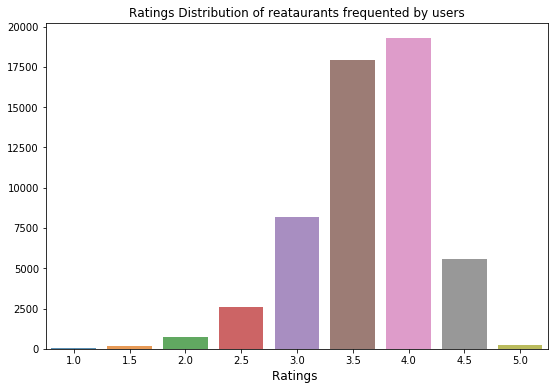

In [71]:
plt.figure(figsize=(9,6))
ax= sns.barplot(xr, yr,data= users_attr ,alpha=0.8 )
plt.title("Ratings Distribution of reataurants frequented by users")
plt.xlabel('Ratings ', fontsize=12)

In [72]:
xp = users_attr['attr_RestaurantsPriceRange2'].value_counts().index
yp = users_attr['attr_RestaurantsPriceRange2'].value_counts().values

Text(0.5, 0, 'Price Range')

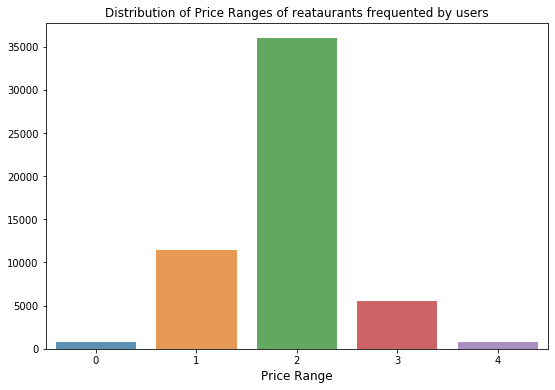

In [73]:
plt.figure(figsize=(9,6))
ax= sns.barplot(xp, yp,data= users_attr ,alpha=0.8 )
plt.title("Distribution of Price Ranges of reataurants frequented by users")
plt.xlabel('Price Range', fontsize=12)

In [74]:
business_cat.cuisine.head()

0     Asian Fusion, Hawaiian
7                    Belgian
16            Specialty Food
57                       nil
58                    Korean
Name: cuisine, dtype: object

In [75]:
def buisness_cat_plot(colname):
    business_colname = ', '.join(business_cat[colname])
    colname_x = pd.DataFrame(business_colname.split(', '),columns=['colname'])
    
    x = colname_x.colname.value_counts()
    x = x.sort_values(ascending=False)
    x = x.iloc[0:20] 
    
    plt.figure(figsize=(16,4))
    ax = sns.barplot(x.index[1:], x.values[1:], alpha=0.8)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.title("Distribution of restaurants by {}s".format(colname))
    plt.show()

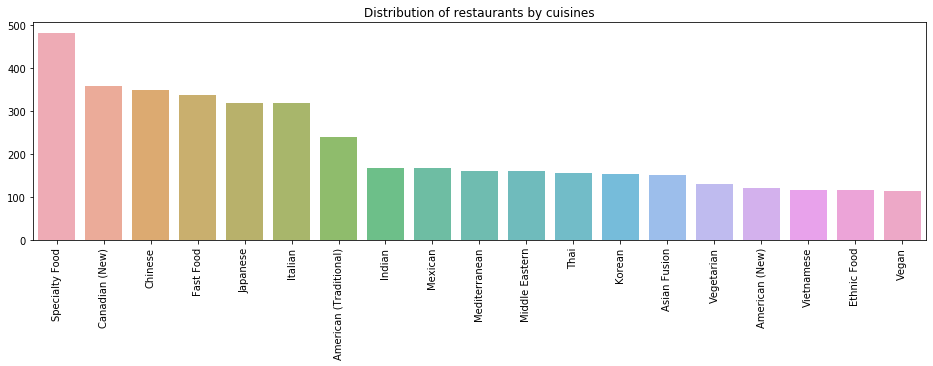

In [76]:
buisness_cat_plot('cuisine')

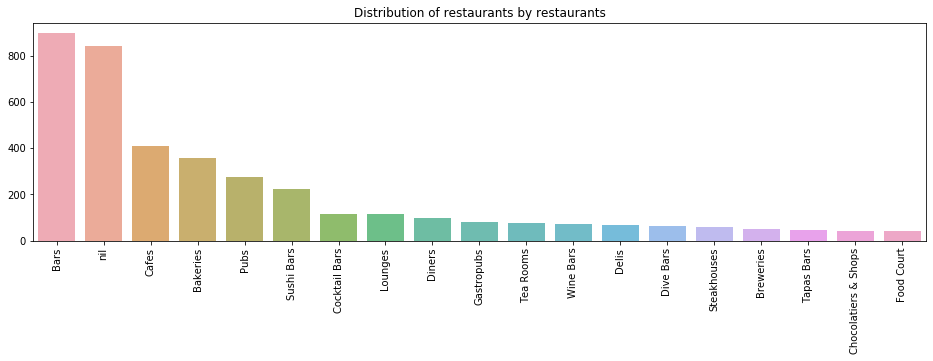

In [77]:
buisness_cat_plot('restaurant')

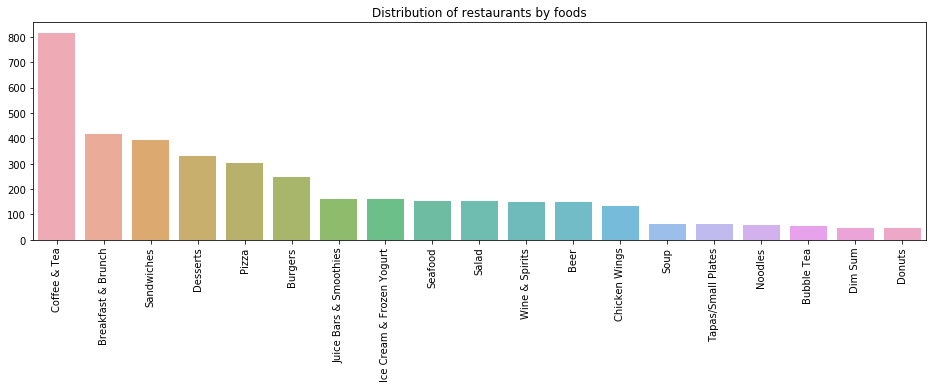

In [78]:
buisness_cat_plot('food')

In [79]:
xn = toronto['name'].value_counts().sort_values(ascending = False)

xn =xn.iloc[0:25]

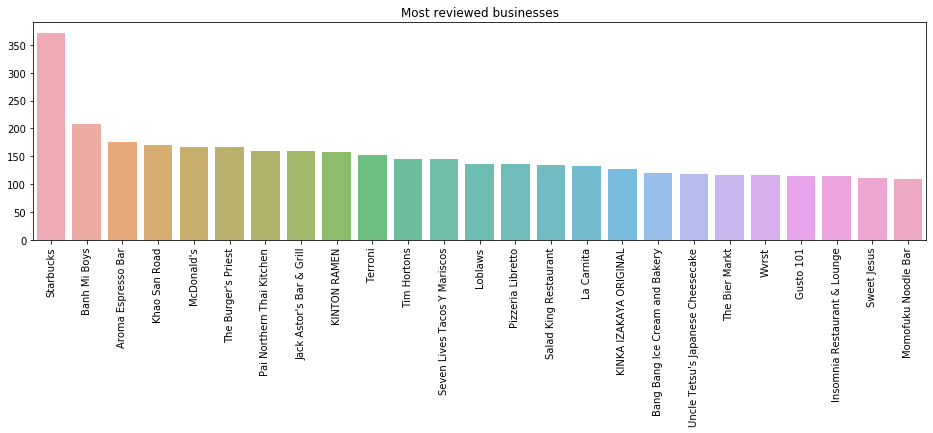

In [80]:
plt.figure(figsize=(16,4))
ax = sns.barplot(xn.index, xn.values, alpha=0.8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Most reviewed businesses")
plt.show()

In [81]:
# Lets find most popular attributes

In [82]:
import nltk

In [83]:
users_attr.description

0        stars_4.0, attr_RestaurantsDelivery_1, attr_Re...
1        stars_4.0, attr_RestaurantsDelivery_1, attr_Re...
2        stars_4.0, attr_RestaurantsDelivery_1, attr_Re...
3        stars_4.0, attr_RestaurantsDelivery_1, attr_Re...
4        stars_4.0, attr_RestaurantsDelivery_1, attr_Re...
                               ...                        
54638    n, i, l, Fast Food, Tex-Mex, Mexican, Food Cou...
54639    n, i, l, Fast Food, Tex-Mex, Mexican, Food Cou...
54640    n, i, l, Fast Food, Tex-Mex, Mexican, Food Cou...
54641    n, i, l, Mexican, Fast Food, Tex-Mex, Restaura...
54642    n, i, l, Mexican, Fast Food, Tex-Mex, Restaura...
Name: description, Length: 54643, dtype: object

In [84]:
x = users_attr.description[1].split(',')[1]
a = x.split('_')
a
a = '_'.join(a[1:])
a

'RestaurantsDelivery_1'

In [85]:
attr_list = []
for i in range(users_attr.shape[0]):
    desc = users_attr.description[i].split(',')
    for x in desc:
        if ('_' in x):
            x = x.split('_', maxsplit=-1)
            if len(x) == 2:
                x = "_".join(x)
                attr_list.append(x)
            else:
                if len(x) > 2:
                    if x[1] == 'RestaurantsPriceRange2':
                        x = "_".join(x[1:])
                        attr_list.append(x)
                    else: 
                        x = "_".join(x[1:-1])
                        attr_list.append(x)
    
attr_list[:10]

attr_list_plot = []
for i in attr_list:
    if 'nan' in i:
        pass
    else:
        attr_list_plot.append(i)
        
attr_list_plot[:10]

['stars_4.0',
 'RestaurantsDelivery',
 'RestaurantsPriceRange2_2',
 'RestaurantsTakeOut',
 'BikeParking',
 'Caters',
 'OutdoorSeating',
 'GoodForKids',
 'Ambience_casual',
 'GoodForMeal_latenight']

,Word,Frequency
0,BikeParking,46432
1,RestaurantsTakeOut,44990
2,RestaurantsAttire_casual,39458
3,RestaurantsGoodForGroups,36642
4,RestaurantsPriceRange2_2,35595
5,NoiseLevel_average,30132
6,GoodForKids,29182
7,BusinessParking_street,28033
8,RestaurantsReservations,24634
9,Ambience_casual,24271


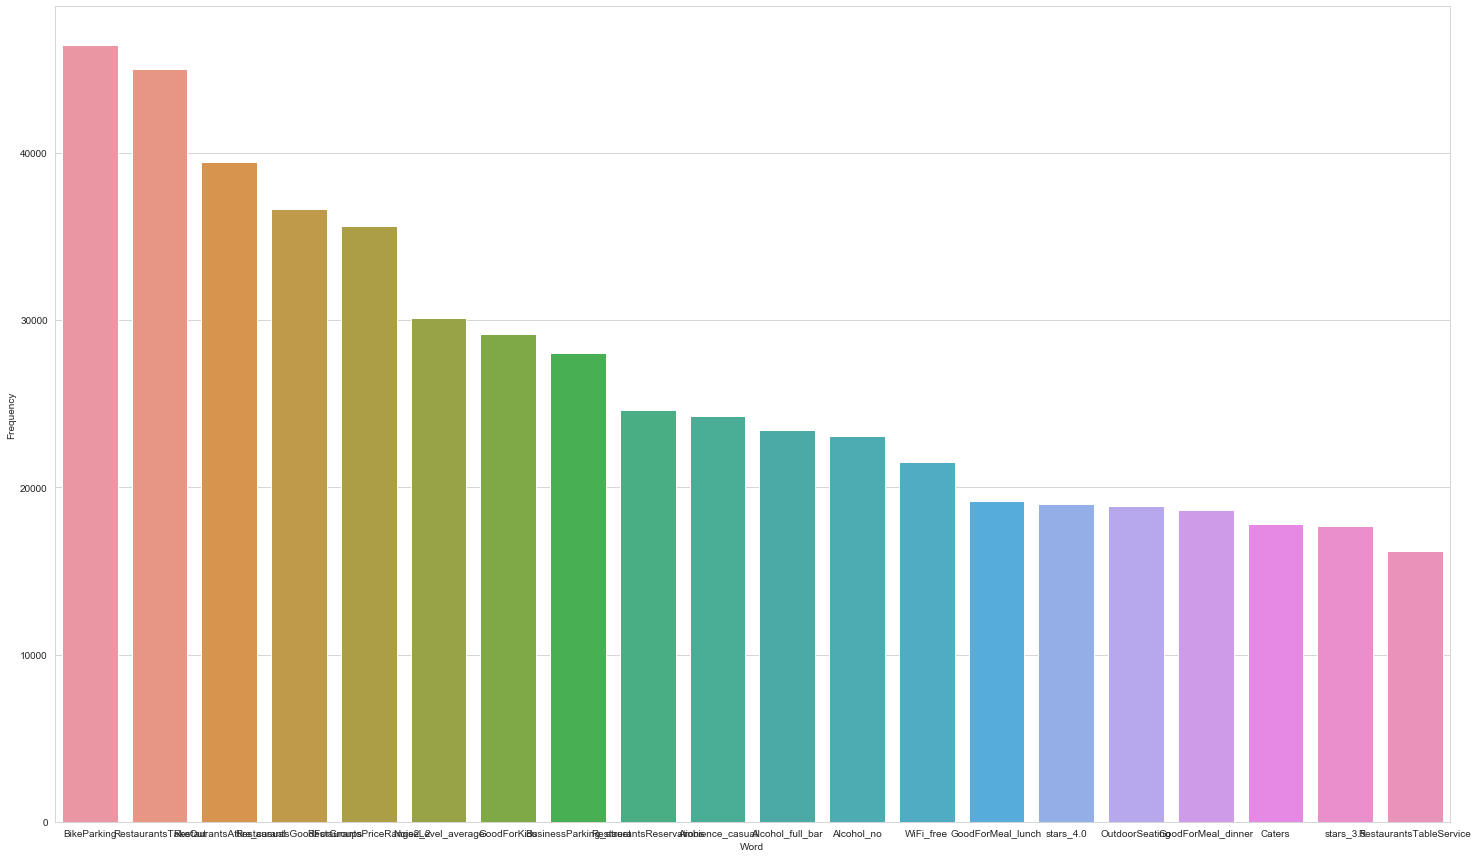

In [86]:
top_N = 100
word_dist = nltk.FreqDist(attr_list_plot)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(25,15))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(20))
rslt.head(20)